In [1]:
%cd ~/REVIVAL2

/disk2/fli/REVIVAL2


In [9]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from REVIVAL.util import get_file_name

%matplotlib inline

In [48]:
# merge all trpb datasets
all_trpb = []
parlq = []
rma = []
for f in glob("data/meta/*.csv"):
    df = pd.read_csv(f)
    df["Library"] = get_file_name(f)
    common_col = ["Library", "AAs", "fitness", "n_mut"]
    if "scope" in f:
        continue
    elif "TrpB" in f:
        df = df[common_col].copy()
        all_trpb.append(df)
    elif "ParLQ" in f:
        df = df[common_col + ["selectivity"]].copy()
        parlq.append(df)
    elif "Rma" in f:
        df = df[common_col + ["selectivity"]].copy()
        rma.append(df)
all_trpb = pd.concat(all_trpb)
all_parlq = pd.concat(parlq)
all_rma = pd.concat(rma)

In [38]:
len(all_trpb), len(all_parlq), len(all_rma)

(2478, 1218, 300)

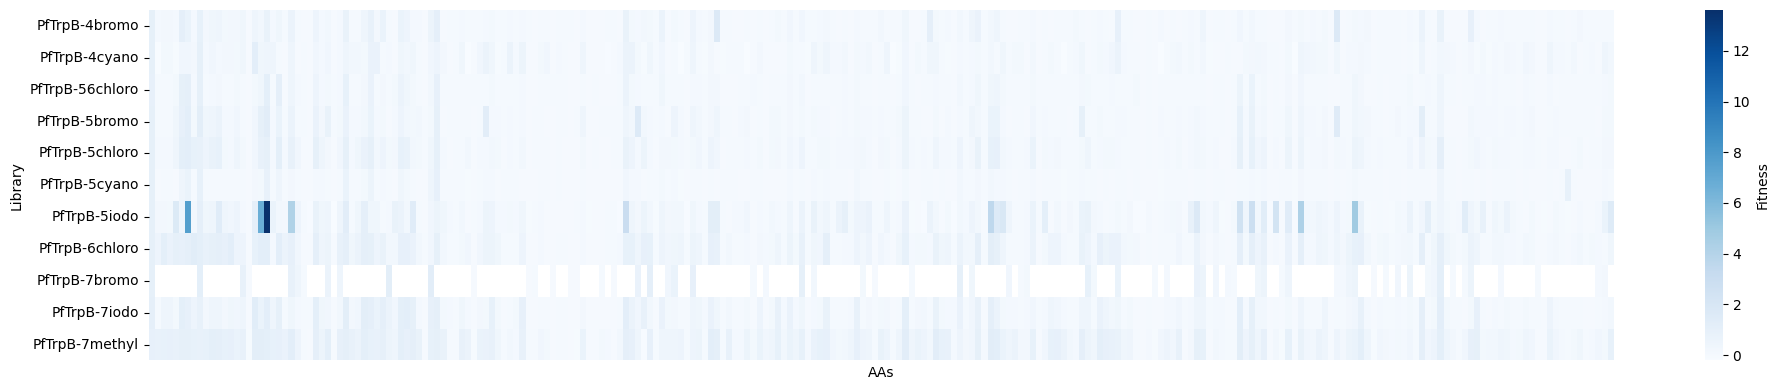

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming 'all_parlq' contains 'AAs' and 'n_mut' columns

# Step 1: Sort or Cluster the AAs based on n_mut
# If you want to sort the AAs by 'n_mut' (assuming 'n_mut' is a column in 'all_parlq'):
sorted_AAs = all_trpb.groupby('AAs')['n_mut'].mean().sort_values().index.tolist()

# Step 2: Pivot the DataFrame based on sorted AAs
heatmap_data = all_trpb.pivot_table(index="Library", columns="AAs", values="fitness", aggfunc="mean")

# Reorder the columns based on sorted AAs
heatmap_data = heatmap_data[sorted_AAs]

# Step 3: Create the heatmap
plt.figure(figsize=(20, 4))
sns.heatmap(
    heatmap_data,
    cmap="Blues",  # A better colormap than "hot"
    annot=False,  # Disable annotations inside the cells
    linewidths=0,  # Add a line between cells for better separation
    linecolor="gray",  # Color of the lines between cells
    cbar_kws={'label': 'Fitness'},  # Add a label to the color bar
    xticklabels=False,  # Show x-axis labels
    yticklabels=True,  # Show y-axis labels
    # square=True,  # Make the heatmap square (optional)
)

# Adjust the labels and title
# plt.title("Heatmap of Activity vs AAs for Different Libraries", fontsize=24)
# plt.xlabel("Amino Acids (AAs)", fontsize=18)
# plt.ylabel("Library", fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


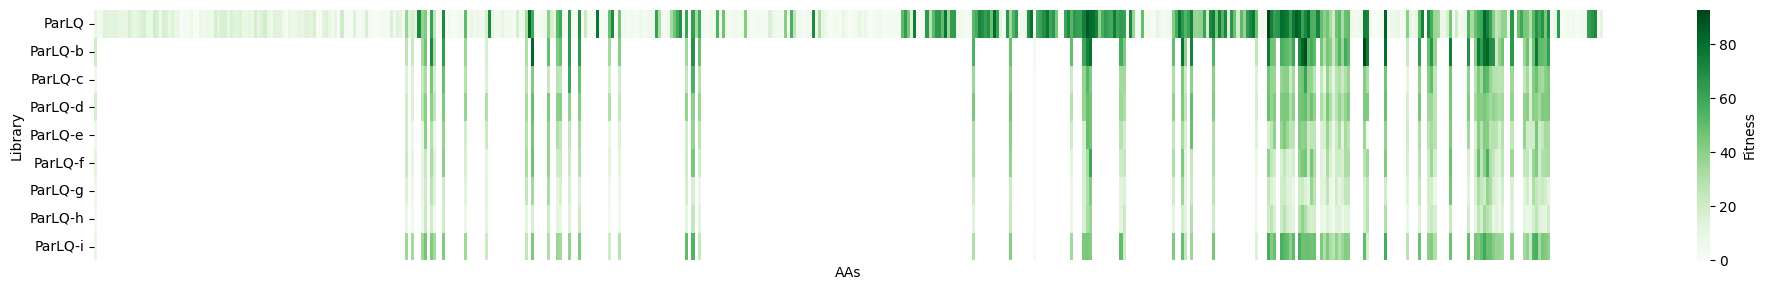

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming 'all_parlq' contains 'AAs' and 'n_mut' columns

# Step 1: Sort or Cluster the AAs based on n_mut
# If you want to sort the AAs by 'n_mut' (assuming 'n_mut' is a column in 'all_parlq'):
sorted_AAs = all_parlq.groupby('AAs')['n_mut'].mean().sort_values().index.tolist()

# Step 2: Pivot the DataFrame based on sorted AAs
heatmap_data = all_parlq.pivot_table(index="Library", columns="AAs", values="fitness", aggfunc="mean")

# Reorder the columns based on sorted AAs
heatmap_data = heatmap_data[sorted_AAs]

# Step 3: Create the heatmap
plt.figure(figsize=(20, 3))
sns.heatmap(
    heatmap_data,
    cmap="Greens",  # A better colormap than "hot"
    annot=False,  # Disable annotations inside the cells
    linewidths=0,  # Add a line between cells for better separation
    linecolor="gray",  # Color of the lines between cells
    cbar_kws={'label': 'Fitness'},  # Add a label to the color bar
    xticklabels=False,  # Show x-axis labels
    yticklabels=True,  # Show y-axis labels
    # square=True,  # Make the heatmap square (optional)
)

# Adjust the labels and title
# plt.title("Heatmap of Activity vs AAs for Different Libraries", fontsize=24)
# plt.xlabel("Amino Acids (AAs)", fontsize=18)
# plt.ylabel("Library", fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


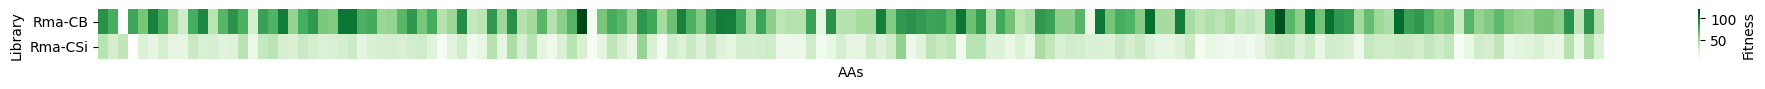

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming 'all_parlq' contains 'AAs' and 'n_mut' columns

# Step 1: Sort or Cluster the AAs based on n_mut
# If you want to sort the AAs by 'n_mut' (assuming 'n_mut' is a column in 'all_parlq'):
sorted_AAs = all_rma.groupby('AAs')['n_mut'].mean().sort_values().index.tolist()

# Step 2: Pivot the DataFrame based on sorted AAs
heatmap_data = all_rma.pivot_table(index="Library", columns="AAs", values="fitness", aggfunc="mean")

# Reorder the columns based on sorted AAs
heatmap_data = heatmap_data[sorted_AAs]

# Step 3: Create the heatmap
plt.figure(figsize=(20, 1))
sns.heatmap(
    heatmap_data,
    cmap="Greens",  # A better colormap than "hot"
    annot=False,  # Disable annotations inside the cells
    linewidths=0,  # Add a line between cells for better separation
    linecolor="gray",  # Color of the lines between cells
    cbar_kws={'label': 'Fitness'},  # Add a label to the color bar
    xticklabels=False,  # Show x-axis labels
    yticklabels=True,  # Show y-axis labels
    # square=True,  # Make the heatmap square (optional)
)

# Adjust the labels and title
# plt.title("Heatmap of Activity vs AAs for Different Libraries", fontsize=24)
# plt.xlabel("Amino Acids (AAs)", fontsize=18)
# plt.ylabel("Library", fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()
